In [2]:
from utilities import *
import matplotlib.pyplot as plt
from astropy.table import QTable,hstack,vstack
plt.rcParams['figure.dpi'] = 300
plothome='/blue/adamginsburg/d.jeff/SgrB2DS_COMAnalysis/plots/LiteratureComparisonPlots/'

In [3]:
dsratiomeasurements=QTable.read(f'/blue/adamginsburg/d.jeff/SgrB2DS_COMAnalysis/tables/thesis_ethanolmethanol_results/ratios_at_central_pixel.fits')
ds_distances=np.ones(len(dsratiomeasurements))*(0.1*u.kpc)
ds_distances

<Quantity [0.1, 0.1, 0.1, 0.1] kpc>

In [4]:
chen2023_ethanolcolumn=np.array([3.1,5.5,17,24,12,8,2.8,8.5,1.4,0.2,6,1.6,2,1.3])*10**16*u.cm**-2
chen2023_ethanolcolumnerror=np.array([0.8,1.5,4,4,3,2,0.7,1.5,0.3,0.05,1.5,0.3,0.5,0.4])*10**16*u.cm**-2
chen2023_ethanoltex=np.array([160,170,160,160,170,180,120,160,140,180,140,190,180,180])*u.K
chen2023_ethanoltexerror=np.array([40,30,np.nan,40,30,20,40,20,40,np.nan,40,50,30,20])*u.K

chen2023_methanolcolumn=np.array([3.6,4.4,13,26,9.6,7.9,1.8,8.2,1.4,0.53,2.1,4.9,5.4,3.9])*10**18*u.cm**-2
chen2023_methanolcolumnerror=np.array([1.1,1.3,4,7,2.8,2.3,0.7,2.5,0.3,0.2,0.8,1.5,1.6,1.1])*10**18*u.cm**-2
chen2023_ethanolmethanolratios=chen2023_ethanolcolumn/chen2023_methanolcolumn
chen2023_ethanolmethanolratioserror=np.sqrt(((1/chen2023_methanolcolumn)*(chen2023_ethanolcolumnerror))**2+((-chen2023_ethanolcolumn/(chen2023_methanolcolumn**2))*(chen2023_methanolcolumnerror))**2)

chen2023_sourcegalactocentricdistances=[4.4,5.1,5,4.2,6.8,6.8,6.3,6.4,6.6,5.4,5.3,6.4,6.4,6.8]*u.kpc
chen2023_nh2=np.array([])*u.cm**-2

In [5]:
bonfand2019_ethanolcolumn=np.array([2e18,3.1e17,2.5e16,1e17])*u.cm**-2
bonfand2019_methanolcolumn=np.array([4e19,7.5e18,2.5e17,2e18])*u.cm**-2
bonfand2019_ethanolmethanolratio=bonfand2019_ethanolcolumn/bonfand2019_methanolcolumn
bonfand2019_distances=np.ones(4)*(0.1*u.kpc)#jeff2024_dGC
bonfand2019_trots=[150,145,145,145]*u.K
print(bonfand2019_distances)
bonfand2017_beamwidth=1.6*u.arcsec#4000*u.AU
estimated_emission_region_radius=0.3*u.arcsec#1500*u.AU
dilution_factor=(bonfand2017_beamwidth**2+estimated_emission_region_radius**2)/(estimated_emission_region_radius**2)
estimated_true_sgrb2n_ratios=bonfand2019_ethanolmethanolratio*dilution_factor
print(f'Average beam dilution-corrected ratio in Sgr B2(N): {np.mean(estimated_true_sgrb2n_ratios)}')
print(f'Sgr B2(N) beam dilution-corrected ratios: {estimated_true_sgrb2n_ratios}')

[0.1 0.1 0.1 0.1] kpc
Average beam dilution-corrected ratio in Sgr B2(N): 1.776481481481482
Sgr B2(N) beam dilution-corrected ratios: [1.47222222 1.21703704 2.94444444 1.47222222]


In [6]:
#These measurements are pulled from the blue polygons in Figures 1 and 2, which may also explain why they're so strangely low. Assuming the ethanol is coming
#from small regions like DS, it's being smeared out 
names=QTable({'Source':['N1','N2','N2','N3']})#,'N4']
moller2023_n1=QTable([{'X(C2H5OH)':10**-7.1,'X(CH3OH)':10**-5.3,'Tex':318*u.K}])#AN01
moller2023_n2=QTable({'X(C2H5OH)':[10**-6.7,10**-6.6],'X(CH3OH)':[10**-4.6,10**-4.6],'Tex':[173,188]*u.K})#AN02,03
moller2023_n3=QTable([{'X(C2H5OH)':10**-7.8,'X(CH3OH)':10**-5.4,'Tex':108*u.K}])#AN08
#moller2023_n4={'X(C2H5OH)':[''],'X(CH3OH)':[10**-7.4],'Tex':['']}#AN14
moller2023table=hstack([names,vstack([moller2023_n1,moller2023_n2,moller2023_n3])])
moller2023_ethanolmethanolratio=moller2023table['X(C2H5OH)']/moller2023table['X(CH3OH)']

In [7]:
shimonishi2021_ethanolcolumn=9.6e14*u.cm**-2
shimonishi2021_ethanolcolumnerror=1.3e14*u.cm**-2
shimonishi2021_ethanoltrot=136*u.K
shimonishi2021_ethanoltroterror=np.array([[14],[12]])*u.K

shimonishi2021_methanolcolumn=1.9e16*u.cm**-2
shimonishi2021_methanolcolumnerror=0.1e16*u.cm**-2
shimonishi2021_methanoltrot=245*u.K
shimonishi2021_methnoltroterror=4*u.K

shimonishi2021_ethanolmethanolratio=shimonishi2021_ethanolcolumn/shimonishi2021_methanolcolumn
shimonishi2021_ethanolmethanolratioerror=np.sqrt(((1/shimonishi2021_methanolcolumn)*(shimonishi2021_ethanolcolumnerror))**2+((-shimonishi2021_ethanolcolumn/(shimonishi2021_methanolcolumn**2))*(shimonishi2021_methanolcolumnerror))**2)
shimonishi2021_distance=19.0*u.kpc

In [8]:
requenatorres2006_xethanol=np.array([6,2.5,1.2,0.8,1.2,0.4,2.1,0.8,0.7,0.8,1.3,0.9,0.7,1.3,3.1,3.1,1.4,2.1,0.9,1.2,0.9,0.8,1,0.6])*10**-8
requenatorres2006_nh2=np.array([1,0.6,6.8,1.1,2.2,1.3,3,2.6,2,3.1,3.2,2.9,2.9,3.8,3.9,4.1,2.2,1.4,5.5,4.7,2.3,13.9,8.8,14.6])*u.cm**-2

requenatorres2006_upperlimits_xethanol=np.array([1.4,1.8,1,1.9,0.8,0.6,2.6,0.5,0.5,0.2,0.1,0.04,0.09,0.8])*10**-8
requenatorres2006_forupperlimits_nh2=np.array([0.2,1.5,2.5,0.6,0.2,0.2,0.07,0.6,0.4,0.7,0.8,1.7,0.9,2.8])

requenatorres2006_xmethanol=np.array([11.3,4,3.8,2.7,2.6,1.5,9,3.5,10,3.1,2.5,3.7,1.7,2.8,8.3,7.8,4.8,5.2,1.9,4.2,4.6,4.2,2.9,2.4])*10**-7
#The Trots in this paper are calculated from several molecules (CH3OH, C2H5OH, 13CS, HCOOCH3, (CH3)2O [aka CH3OCH3], and assuming 8 K. 
#We take them in the following order of availability, chosing species that are either C2H5OH or chemically linked to it:
#C2H5OH, CH3OH, CH3OCH3, 8 K
requenatorres2006_trots=np.array([12,10,14,10,12.8,12.7,12.6,11,10,10.5,9,11,10,10,8,10,10,12,10,10,11,11,11,13.9])
requenatorres2006_forupperlimits_xmethanol=np.array([10.6,1.6,0.4,0.6,0.9,0.2,1.1,5,2.4,1.2,1.4,0.6,1.5,2.4])*10**-7
requenatorres2006_forupperlimits_trots=np.array([8,8,8,8,8,8,8,8,8,8,8,8,8,8])*u.K

requenatorres2006_ethanolmethanolratios=requenatorres2006_xethanol/requenatorres2006_xmethanol
requenatorres2006_upperlimits_ethanolmethanolratios=requenatorres2006_upperlimits_xethanol/requenatorres2006_forupperlimits_xmethanol

requenatorres2006_sgrb2nm_xethanol=np.array([2.3,0.3])*10**-8
requenatorres2006_sgrb2nm_nh2=np.array([19,65])*u.cm**-2
requenatorres2006_sgrb2nm_xmethanol=np.array([1.3,0.3])*10**-7
requenatorres2006_sgrb2nm_trots=np.array([72.6,55.4])
requenatorres2006_sgrb2nm_ethanolmethanolratio=requenatorres2006_sgrb2nm_xethanol/requenatorres2006_sgrb2nm_xmethanol

In [9]:
chen2023_ratio_weightedaverage=np.average(chen2023_ethanolmethanolratios,weights=(chen2023_ethanolmethanolratios/chen2023_ethanolmethanolratioserror))
chen2023_ratioerror_average=np.mean(chen2023_ethanolmethanolratioserror)
print(f'CoCCoA Average: {chen2023_ratio_weightedaverage} +/- {chen2023_ratioerror_average}')

print(f'Shimonishi: {shimonishi2021_ethanolmethanolratio} +/- {shimonishi2021_ethanolmethanolratioerror}')

ds_ratio_weightedaverage=np.average(dsratiomeasurements['Ethanol_Methanol_Ratio_central'],
                                    weights=(dsratiomeasurements['Ethanol_Methanol_Ratio_central']/dsratiomeasurements['Error_Ethanol_Methanol_Ratio_central']))
ds_ratioerror_average=np.mean(dsratiomeasurements['Error_Ethanol_Methanol_Ratio_central'])
print(f'DS Average: {ds_ratio_weightedaverage} +/- {ds_ratioerror_average}')
sgrb2n_average=np.mean(bonfand2019_ethanolmethanolratio)
print(f'Sgr B2(N) Average: {sgrb2n_average}')

CoCCoA Average: 0.010114854776986284 +/- 0.0041247194854413605
Shimonishi: 0.05052631578947368 +/- 0.007340720221606648
DS Average: 0.3819970190606243 +/- 0.06852622150485077
Sgr B2(N) Average: 0.060333333333333336


In [10]:
#chen2023_datatable=QTable([chen2023_sourcegalactocentricdistances,chen2023_ethanolcolumn,chen2023_ethanolcolumnerror,chen2023_methanolcolumn,
#                           chen2023_methanolcolumnerror,chen2023_ethanoltex,chen2023_ethanoltexerror,
#                           chen2023_ethanolmethanolratios,chen2023_ethanolmethanolratioserror],names=['Galactocentric_Distance','N_C2H5OH','Error_N_C2H5OH','N_CH3OH','Error_N_CH3OH','Tex_C2H5OH','Error_Tex_C2H5OH','Ethanol_Methanol_Ratio','Error_Ethanol_Methanol_Ratio'])
chen2023_datatable=QTable.read('../literature_data/chen2023_ethanolmethanol.fits')

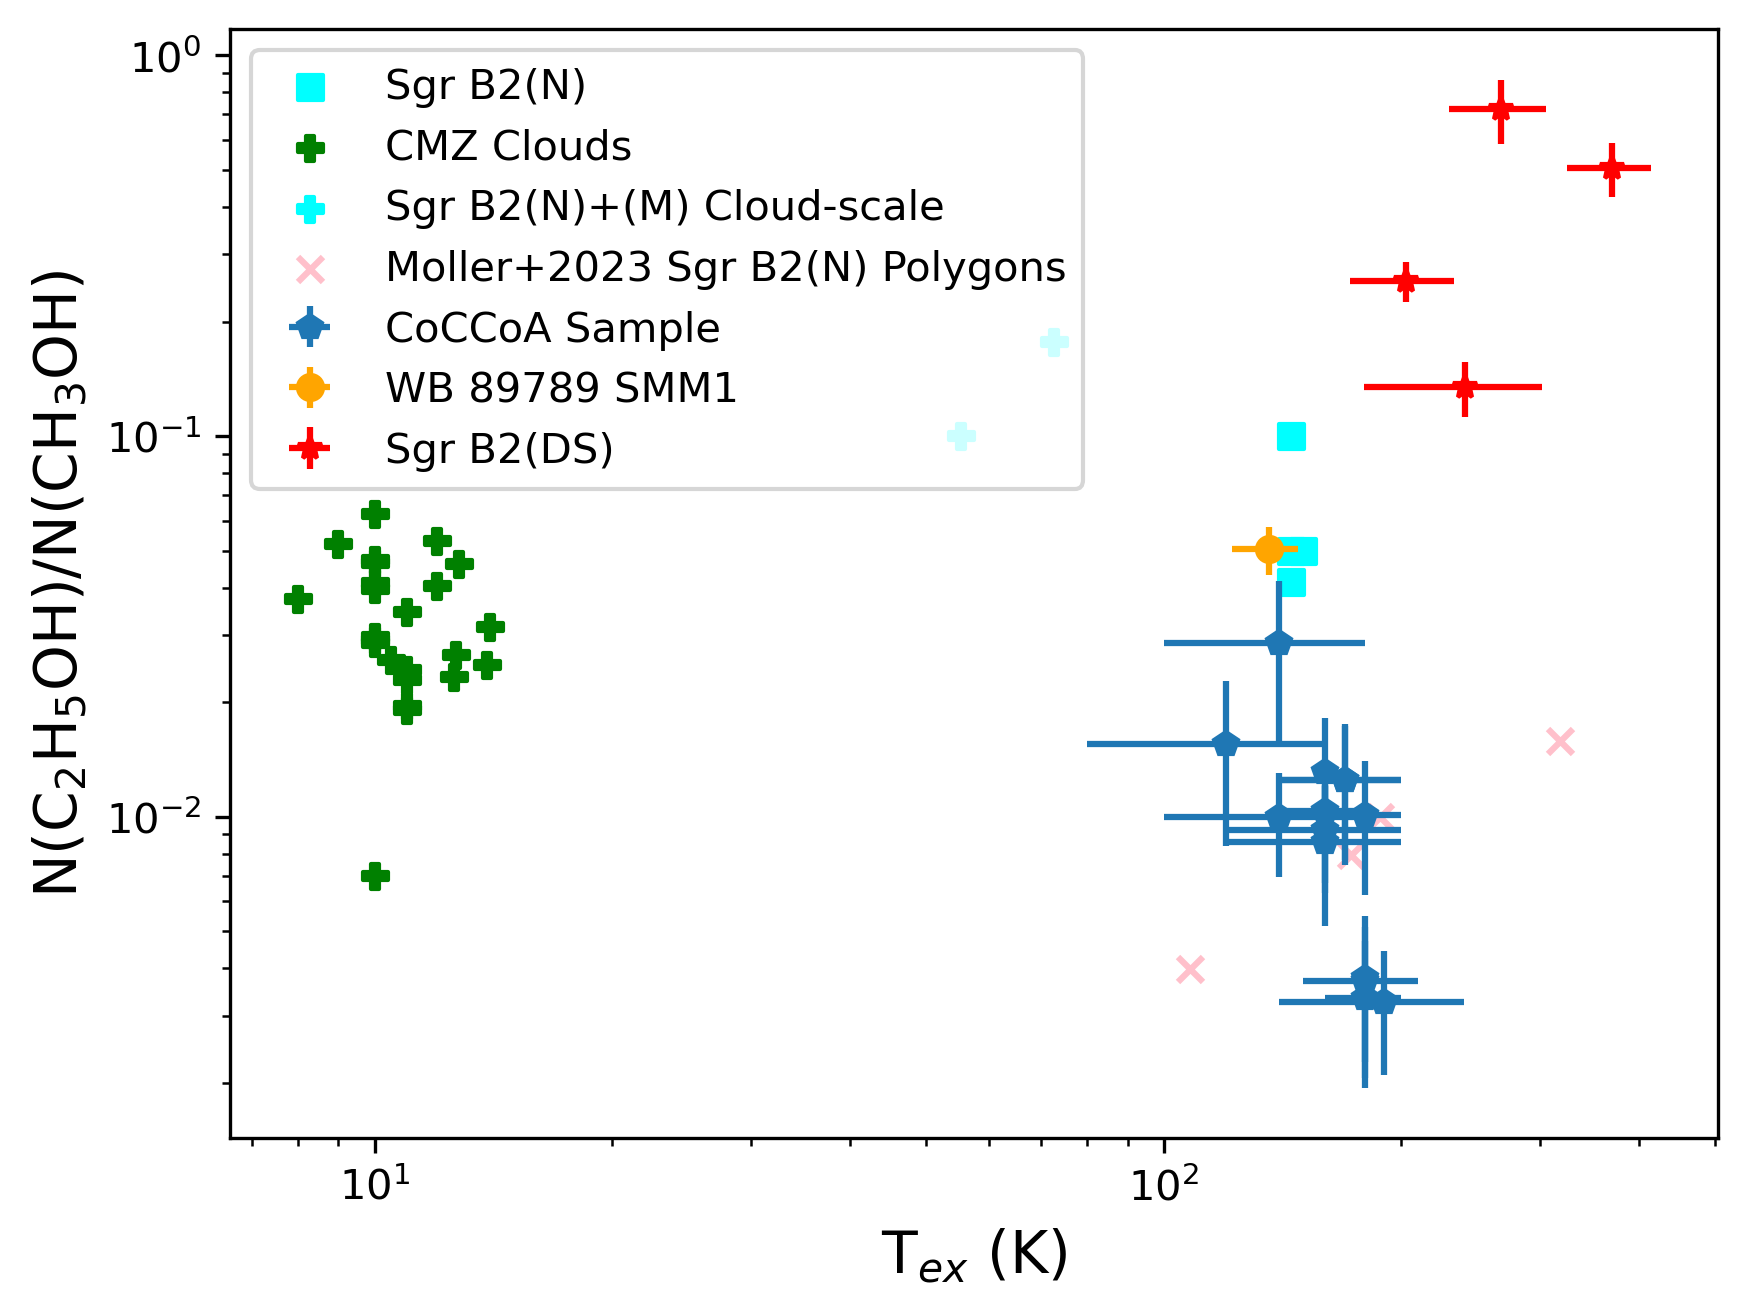

In [12]:
plt.errorbar(chen2023_datatable['Tex_C2H5OH'],chen2023_datatable['Ethanol_Methanol_Ratio'],yerr=chen2023_datatable['Error_Ethanol_Methanol_Ratio'],xerr=chen2023_datatable['Error_Tex_C2H5OH'],fmt='p',label='CoCCoA Sample')
plt.errorbar(shimonishi2021_ethanoltrot,shimonishi2021_ethanolmethanolratio,xerr=shimonishi2021_ethanoltroterror,yerr=shimonishi2021_ethanolmethanolratioerror,fmt='o',color='orange',label='WB 89789 SMM1')
plt.scatter(bonfand2019_trots,bonfand2019_ethanolmethanolratio,color='cyan',marker='s',label='Sgr B2(N)')
plt.errorbar(dsratiomeasurements['Trot_C2H5OH'],dsratiomeasurements['Ethanol_Methanol_Ratio_central'],yerr=dsratiomeasurements['Error_Ethanol_Methanol_Ratio_central'],xerr=dsratiomeasurements['Error_Trot_C2H5OH'],fmt='*',label='Sgr B2(DS)',color='red')
plt.scatter(requenatorres2006_trots,requenatorres2006_ethanolmethanolratios,label='CMZ Clouds',color='green',marker='P')
plt.scatter(requenatorres2006_sgrb2nm_trots,requenatorres2006_sgrb2nm_ethanolmethanolratio,label='Sgr B2(N)+(M) Cloud-scale',color='cyan',marker='P')
plt.scatter(moller2023table['Tex'].value,moller2023_ethanolmethanolratio,marker='x',color='pink',label='Moller+2023 Sgr B2(N) Polygons')
#plt.scatter(requenatorres2006_forupperlimits_trots,requenatorres2006_upperlimits_ethanolmethanolratios,label='CMZ Clouds',color='green',marker='v')
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'N(C$_2$H$_5$OH)/N(CH$_3$OH)',fontsize=14)
plt.xlabel('T$_{ex}$ (K)',fontsize=14)
plt.legend()
plt.savefig(plothome+'cloudandresolvedN_abundanceratiovstex.png')
plt.show()

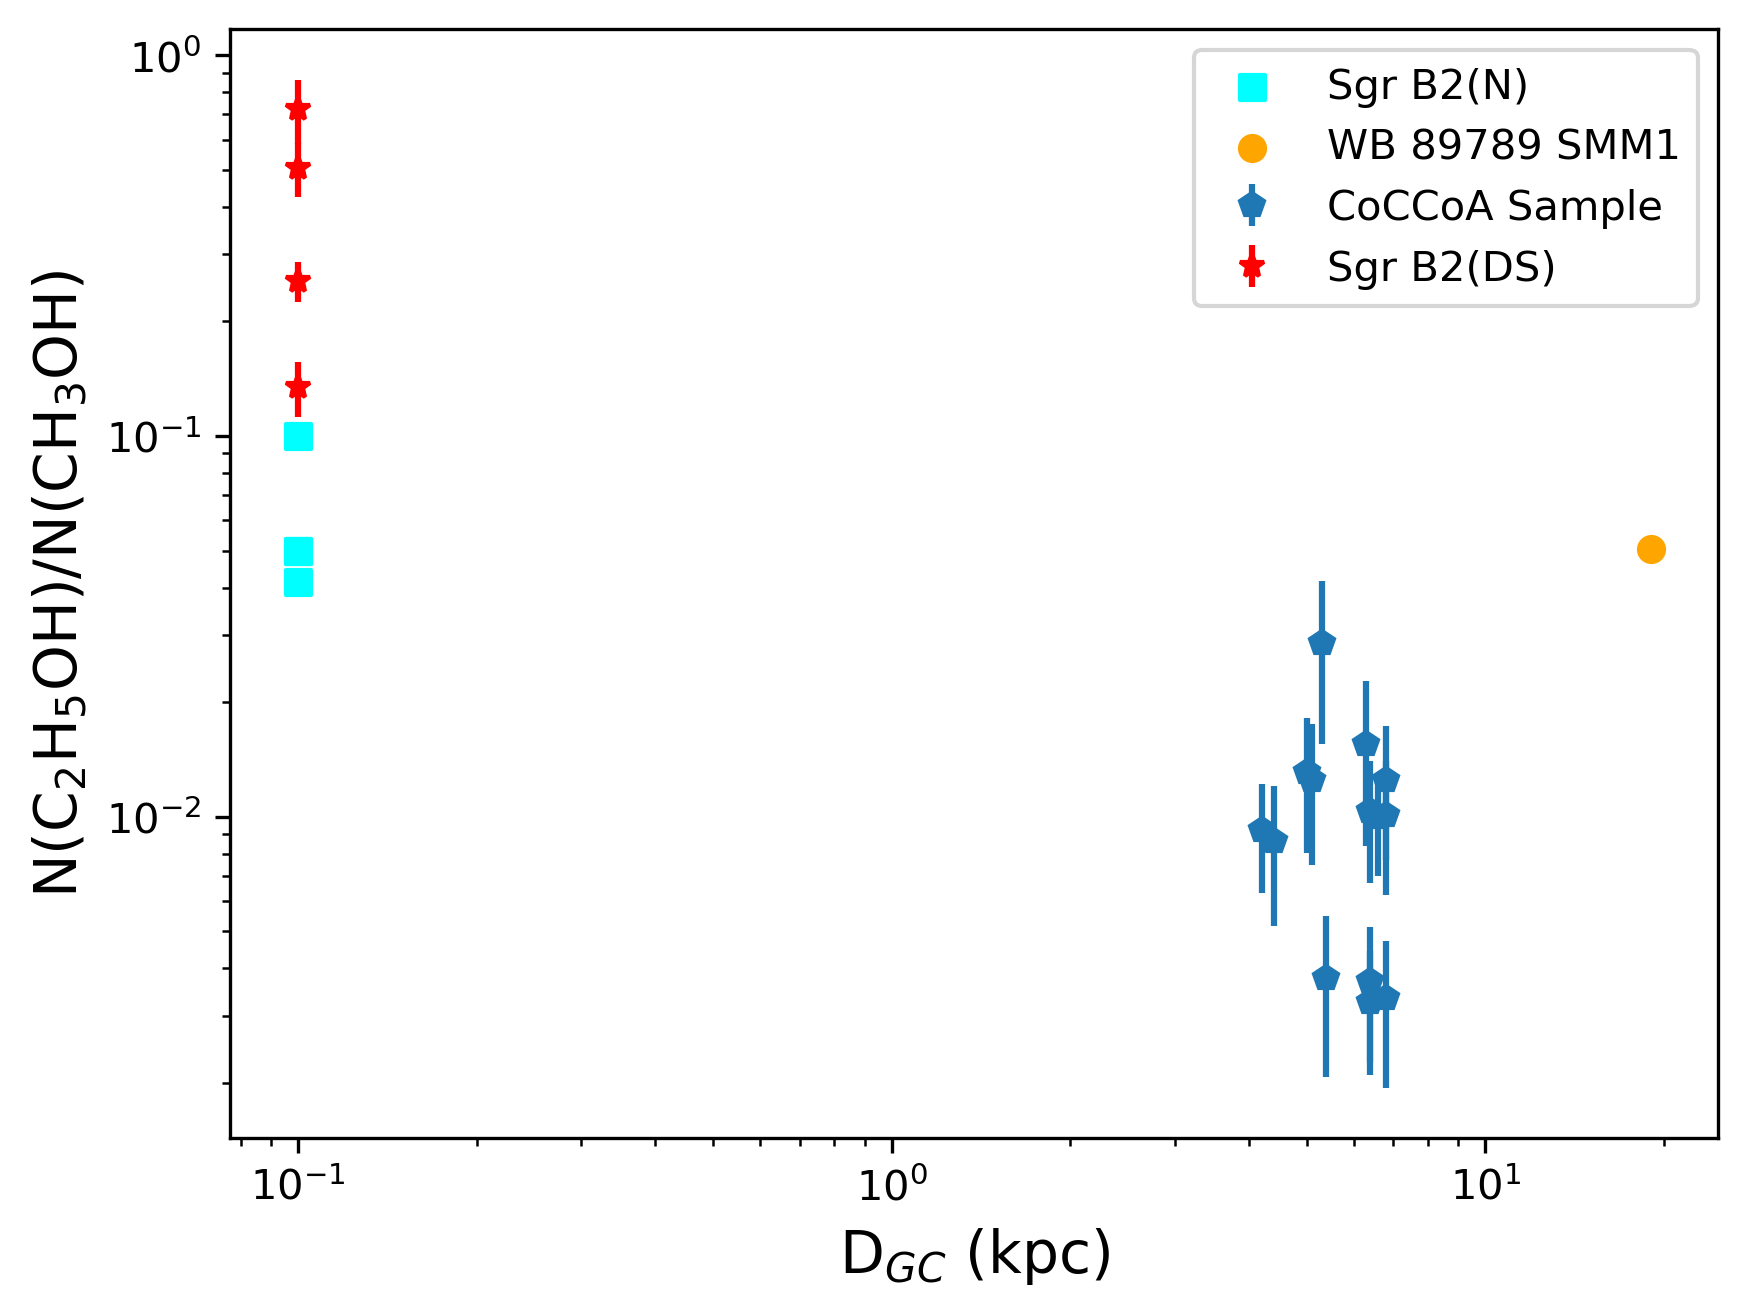

In [20]:
plt.errorbar(chen2023_datatable['Galactocentric_Distance'],chen2023_datatable['Ethanol_Methanol_Ratio'],yerr=chen2023_datatable['Error_Ethanol_Methanol_Ratio'],fmt='p',label='CoCCoA Sample')
plt.scatter(bonfand2019_distances,bonfand2019_ethanolmethanolratio,color='cyan',marker='s',label='Sgr B2(N)')
plt.scatter(shimonishi2021_distance,shimonishi2021_ethanolmethanolratio,color='orange',marker='o',label='WB 89789 SMM1')
plt.errorbar(ds_distances,dsratiomeasurements['Ethanol_Methanol_Ratio_central'],yerr=dsratiomeasurements['Error_Ethanol_Methanol_Ratio_central'],fmt='*',label='Sgr B2(DS)',color='red')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'N(C$_2$H$_5$OH)/N(CH$_3$OH)',fontsize=14)
plt.xlabel('D$_{GC}$ (kpc)',fontsize=14)
plt.legend()
plt.savefig(plothome+'abundanceratiovsgalactocentricdistance.png')
plt.show()

In [ ]:
plt.errorbar(chen2023_datatable['Tex_C2H5OH'],chen2023_datatable['Ethanol_Methanol_Ratio'],yerr=chen2023_datatable['Error_Ethanol_Methanol_Ratio'],xerr=chen2023_datatable['Error_Tex_C2H5OH'],fmt='p',label='CoCCoA Sample')
plt.errorbar(shimonishi2021_ethanoltrot,shimonishi2021_ethanolmethanolratio,xerr=shimonishi2021_ethanoltroterror,yerr=shimonishi2021_ethanolmethanolratioerror,fmt='o',color='orange',label='WB 89789 SMM1')
plt.scatter(bonfand2019_trots,bonfand2019_ethanolmethanolratio,color='cyan',marker='s',label='Sgr B2(N)')
plt.errorbar(dsratiomeasurements['Trot_C2H5OH'],dsratiomeasurements['Ethanol_Methanol_Ratio_central'],yerr=dsratiomeasurements['Error_Ethanol_Methanol_Ratio_central'],xerr=dsratiomeasurements['Error_Trot_C2H5OH'],fmt='*',label='Sgr B2(DS)',color='red')
plt.yscale('log')
plt.ylabel(r'N(C$_2$H$_5$OH)/N(CH$_3$OH)',fontsize=14)
plt.xlabel('T$_{ex}$ (K)',fontsize=14)
plt.legend()
plt.savefig(plothome+'abundanceratiovstex.png')
plt.show()